In [15]:
from plotting_scripts.plot_ts import plot_one_seg_times, plot_scatter_obs_preds, plot_ts_and_scatter
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import xarray as xr

In [6]:
sites = ["01473500", "01474500", "01480617", "01480870", "01481000", "01481500"]

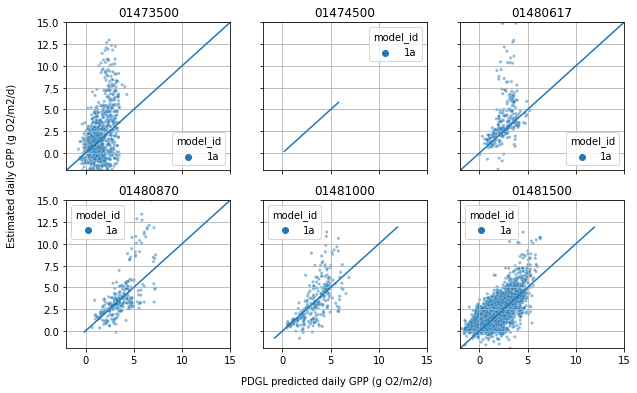

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,6), sharex=True, sharey=True)

for i, site in enumerate(sites):
    ax = axs.flatten()[i]
    ax.set_ylim(-2, 15)
    ax.set_xlim(-2, 15)
    plot_scatter_obs_preds([#"0_baseline_LSTM/nstates_10/nep_100/rep_3/preds.feather",
                        "1a_lstm_metab_just_metab/nstates_10/nep_100/rep_0/val_preds.feather"],
#                         "2_metab_multitask/nstates_10/nep_100/rep_0/preds.feather",
#                         "2a_multitask_do_gpp_er/nstates_10/nep_100/rep_0/val_preds.feather"], 
                       "../well_obs_targets.zarr/", 
                       site,
                       model_labels=['1a'],#, '2a'],
                       start_time="1980-01-01",
                       end_time="2015-10-01",
                       variable="GPP", 
                       spatial_idx_name="site_id", 
                       time_idx_name="date",
                       ax = ax
#                        scatter_obs=False,
#                        figsize=(15, 5)
                      )
    ax.set_ylabel("")
    ax.set_xlabel("")
fig.text(0.05, 0.55, "Estimated daily GPP (g O2/m2/d)", rotation=90, ha='center', va='center')
fig.text(0.5, 0.05, "PDGL predicted daily GPP (g O2/m2/d)", rotation=0, ha='center', va='center')
plt.show()

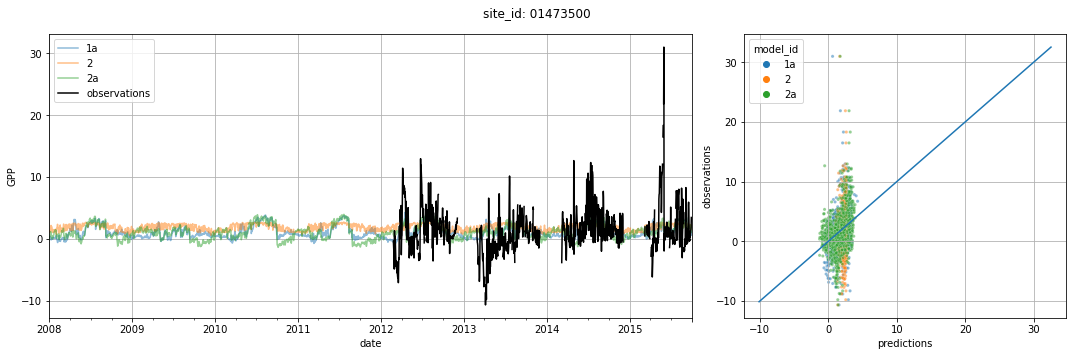

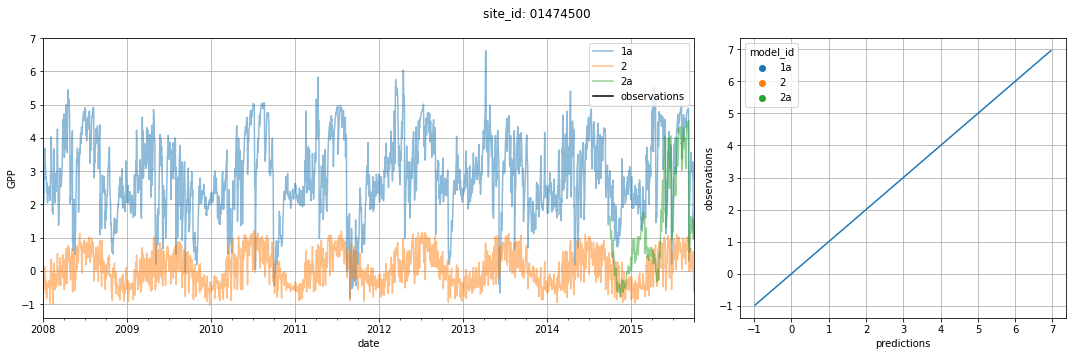

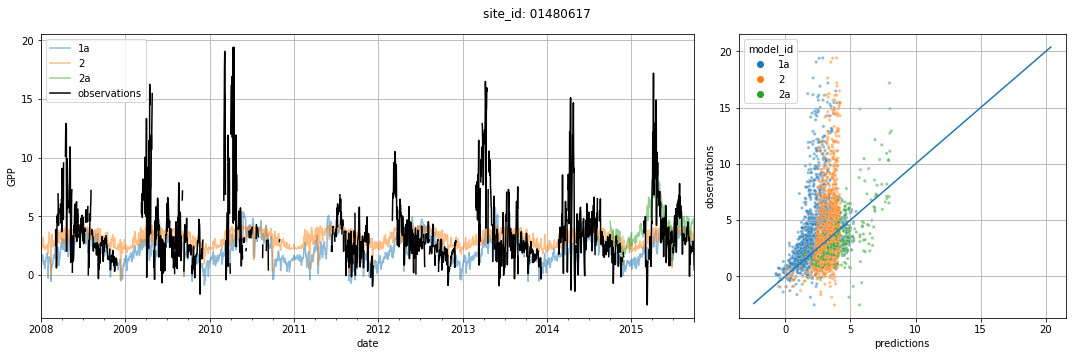

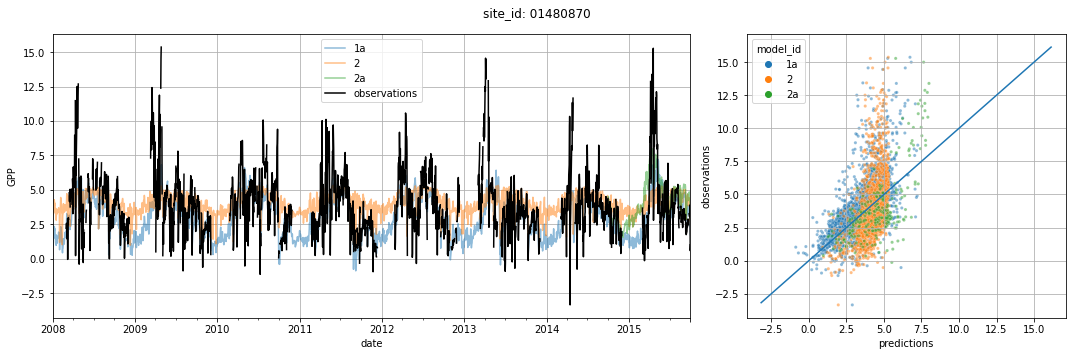

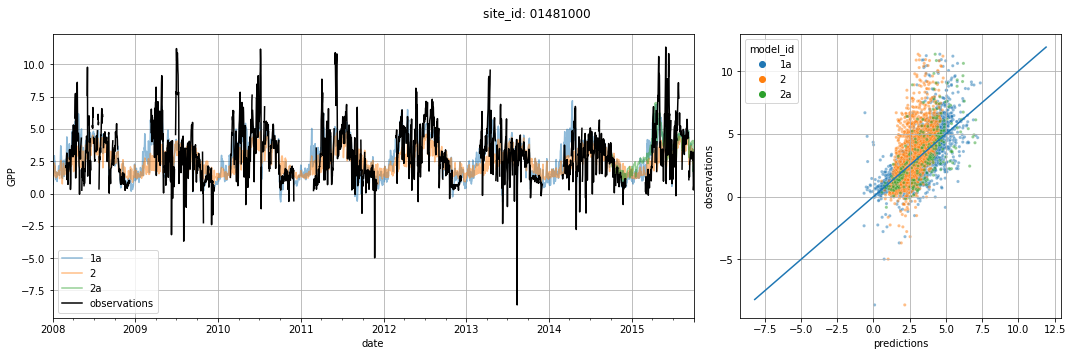

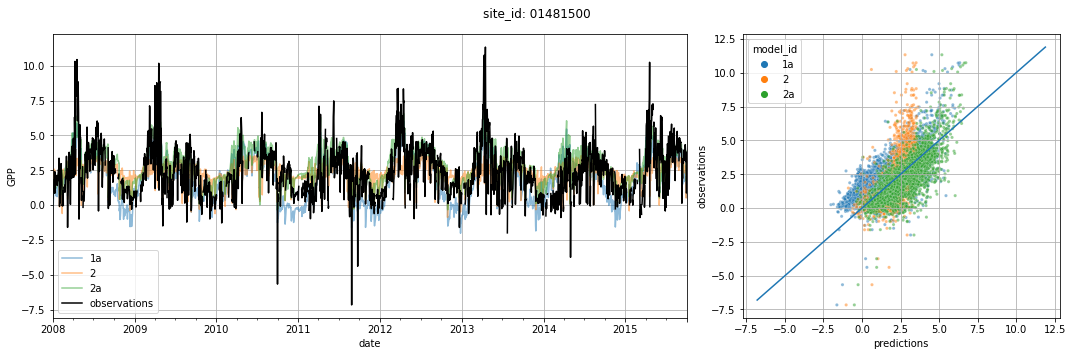

In [31]:
for site in sites:
    plot_ts_and_scatter([#"0_baseline_LSTM/nstates_10/nep_100/rep_3/preds.feather",
                        "1a_lstm_metab_just_metab/nstates_10/nep_100/rep_0/preds.feather",
                        "2_metab_multitask/nstates_10/nep_100/rep_0/preds.feather",
                        "2a_multitask_do_gpp_er/nstates_10/nep_100/rep_0/val_preds.feather"], 
                       "../well_obs_targets.zarr/", 
                       site,
                       model_labels=['1a', '2', '2a'],
                       start_time="2008-01-01",
                       end_time="2015-10-01",
                       variable="GPP", 
                       spatial_idx_name="site_id", 
                       time_idx_name="date",
                       scatter_obs=False,
                       figsize=(15, 5)
                      )
    plt.savefig(f"plots/ts_and_scatter_{site}.jpg", dpi=300)

In [16]:
df = pd.read_feather("2a_multitask_do_gpp_er/nstates_10/nep_100/rep_0/val_preds.feather")

In [18]:
df_sel = df[df['site_id'] == "01480617"]

In [23]:
obs = xr.open_zarr("../well_obs_targets.zarr/")

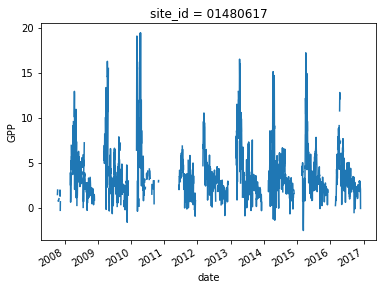

In [28]:
obs.sel(site_id = "01480617").GPP.plot()

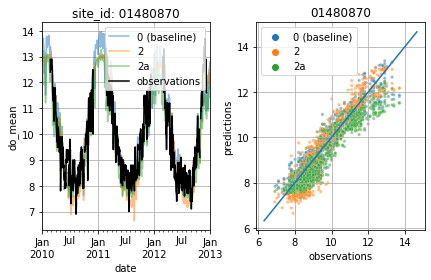

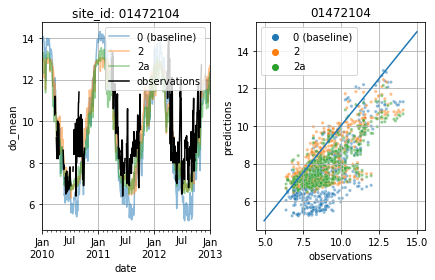

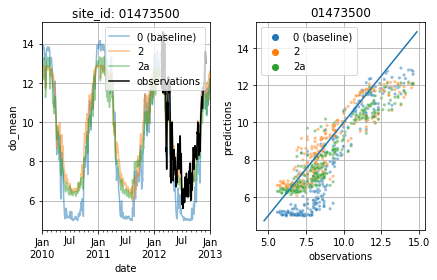

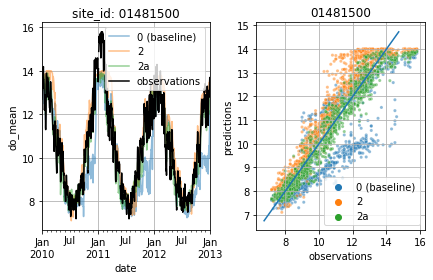

In [6]:
for site in sites:
    fig, axs = plt.subplots(nrows=1, ncols=2)
    plot_one_seg_times(["0_baseline_LSTM/nstates_10/nep_100/rep_0/preds.feather",
                        #"1a_lstm_metab_just_metab/nstates_10/nep_100/rep_0/preds.feather",
                        "2_metab_multitask/nstates_10/nep_100/rep_0/preds.feather",
                        "2a_multitask_do_gpp_er/nstates_10/nep_100/rep_0/preds.feather"], 
                       "../well_obs_targets.zarr/", 
                       site,
                       model_labels=['0 (baseline)', '2', '2a'],
                       start_time="2010-01-01",
                       end_time="2013-01-01",
                       variable="do_mean", 
                       spatial_idx_name="site_id", 
                       time_idx_name="date",
                       scatter_obs=False,
                       ax = axs[0]
                      )
    
    plot_scatter_obs_preds(["0_baseline_LSTM/nstates_10/nep_100/rep_0/preds.feather",
                        #"1a_lstm_metab_just_metab/nstates_10/nep_100/rep_0/preds.feather",
                        "2_metab_multitask/nstates_10/nep_100/rep_0/preds.feather",
                        "2a_multitask_do_gpp_er/nstates_10/nep_100/rep_0/preds.feather"], 
                       "../well_obs_targets.zarr/", 
                       site,
                       model_labels=['0 (baseline)', '2', '2a'],
                       start_time="2010-01-01",
                       end_time="2013-01-01",
                       variable="do_mean", 
                       spatial_idx_name="site_id", 
                       time_idx_name="date",
                            ax = axs[1]
                          )
    
    plt.show()